In [1]:
import pandas as pd
from simpledbf import Dbf5
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
import seaborn as sns
import numpy as np
import pygal
from IPython.display import SVG, display
from pygal.style import Style
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from requests import get
from urllib.request import Request, urlopen
import json

PyTables is not installed. No support for HDF output.


In [2]:
dbf = Dbf5('/home/luis/Dengue/Dengue-19-se.dbf', codec='cp1250')

df = dbf.to_dataframe()

In [3]:
df[['CLASSI_FIN', 'ID_MUNICIP', 'DT_SORO', 'SEM_NOT', 'MUNICIPIO', 'HOSPITAL', 'ID_UNIDADE', 'NU_IDADE_N', 'CS_SEXO', 'CS_RACA', 'CS_ESCOL_N', 'ID_MN_RESI', 'ID_BAIRRO', 'NM_BAIRRO',
'NM_LOGRADO', 'NU_NUMERO', 'ID_GEO2','TPAUTOCTO','EVOLUCAO']]

,CLASSI_FIN,ID_MUNICIP,DT_SORO,SEM_NOT,MUNICIPIO,HOSPITAL,ID_UNIDADE,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,ID_MN_RESI,ID_BAIRRO,NM_BAIRRO,NM_LOGRADO,NU_NUMERO,ID_GEO2,TPAUTOCTO,EVOLUCAO
0,10,432260,2020-04-08,202016,432260,2236370,2236303,4052.0,M,1,9,432260,NaN,EISERMANN,RUA FERNANDO ABOOT,SN,NaN,2,1
1,5,431680,2020-01-29,202004,NaN,NaN,2254964,4051.0,F,1,9,431680,NaN,LINHA SANTA CRUZ,RUA NIDERAU FARAH,57,NaN,NaN,1
2,5,431680,2020-04-17,202016,NaN,NaN,2255529,4057.0,M,1,9,431680,NaN,CRISTAL,CORREDOR OVERBECK,418,NaN,NaN,1
3,10,432260,2020-04-17,202016,NaN,NaN,2236303,4054.0,F,1,9,432260,NaN,CRUZEIRO,RUA BRIGIDA FAGUNDES,1324,NaN,1,1
4,10,432260,2020-04-20,202016,432260,3518892,2236370,4080.0,F,1,1,432260,86,CENTRO,RUA JACON BECKER,582,NaN,1,1
5,10,432260,2020-04-22,202017,NaN,NaN,2236303,4084.0,M,1,9,432260,86,CENTRO,RUA SILVEIRA MARTINS,710,NaN,1,1
6,NaN,432260,2020-04-20,202017,NaN,NaN,2236370,4066.0,F,1,8,432260,86,CENTRO,SILVEIRA MARTINS,727,NaN,NaN,NaN
7,10,432260,2020-04-24,202017,NaN,NaN,2236303,4081.0,M,1,4,432260,86,CENTRO,RUA SILVEIRA MARTINS,710,NaN,1,1
8,10,432260,2020-04-27,202018,NaN,NaN,2236303,4071.0,M,1,6,432260,86,CENTRO,RUA ASSIS BRASIL,789,NaN,1,1
9,5,432260,2020-04-29,202018,NaN,NaN,2236303,4025.0,M,1,3,432260,NaN,NaN,RUA ALOISIO THEIS,990,NaN,NaN,1


In [4]:
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='432260')),'Venâncio Aires', df['ID_MUNICIP'])     # Venancio Aires
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='431680')),'Santa Cruz do Sul', df['ID_MUNICIP'])  # Santa Cruz do Sul
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='431215')),'Mato Leitão', df['ID_MUNICIP'])        # Mato Leitao
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='430957')),'Herveiras', df['ID_MUNICIP'])          # Herveiras
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='432067')),'Sinimbú', df['ID_MUNICIP'])            # Sinimbu
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='431395')),'Pantano Grande', df['ID_MUNICIP'])     # Pantano Grande
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='430420')),'Candelária', df['ID_MUNICIP'])         # Candelaria
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='431407')),'Passo do Sobrado', df['ID_MUNICIP'])   # Passo do Sobrado
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='432252')),'Vale Verde', df['ID_MUNICIP'])         # Vale Verde
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='432253')),'Vale do Sol', df['ID_MUNICIP'])        # Vale do Sol
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='430915')),'Gramado Xavier', df['ID_MUNICIP'])     # Gramado Xavier
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='431570')),'Rio Pardo', df['ID_MUNICIP'])          # Rio Pardo
df['ID_MUNICIP']= np.where(((df['ID_MUNICIP']=='432270')),'Vera Cruz', df['ID_MUNICIP'])          # Vera Cruz

In [5]:
df['TPAUTOCTO']= np.where(((df['TPAUTOCTO']=='1')),'Autoctone', df['TPAUTOCTO'])         
df['TPAUTOCTO']= np.where(((df['TPAUTOCTO']=='2')),'Importado', df['TPAUTOCTO'])         

In [6]:
df['EVOLUCAO']= np.where(((df['EVOLUCAO']=='1')),'Cura', df['EVOLUCAO'])         
df['EVOLUCAO']= np.where(((df['EVOLUCAO']=='2')),'Obito pelo agravo', df['EVOLUCAO'])  
df['EVOLUCAO']= np.where(((df['EVOLUCAO']=='3')),'Obito por outras causas', df['EVOLUCAO'])         
df['EVOLUCAO']= np.where(((df['EVOLUCAO']=='4')),'Obito em investigacao', df['EVOLUCAO'])  
df['EVOLUCAO']= np.where(((df['EVOLUCAO']=='9')),'Ignorado', df['EVOLUCAO'])         

In [7]:
df['NM_BAIRRO'] = df['NM_BAIRRO'].str.replace(" ","\n")

In [8]:
df['SEM_NOT'] = df['SEM_NOT'].str[4:]
df['NU_IDADE_N']= np.where(((df['NU_IDADE_N'].astype(int) - 4000) < 0), df['NU_IDADE_N'], df['NU_IDADE_N'].astype(int) - 4000) 
df['NU_IDADE_N']= np.where(((df['NU_IDADE_N'].astype(int) - 3000) < 0), df['NU_IDADE_N'], df['NU_IDADE_N'].astype(int) - 3000) 
df['NU_IDADE_N']= np.where(((df['NU_IDADE_N'].astype(int) - 2000) < 0), df['NU_IDADE_N'], df['NU_IDADE_N'].astype(int) - 2000) 
df['NU_IDADE_N']= np.where(((df['NU_IDADE_N'].astype(int) - 1000) < 0), df['NU_IDADE_N'], df['NU_IDADE_N'].astype(int) - 1000) 

In [9]:
df_cnes = pd.read_csv('/home/luis/Dengue/base_cnes/tbEstabelecimentoRS.csv')

def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

def pesquisa_id_unidade(n):

    if RepresentsInt(n) == True:
        
        result = df_cnes[df_cnes['CO_CNES'] == int(n)]['NO_RAZAO_SOCIAL'].str.replace(" ","\n")
    
    else:
        result = [n]
        
    return result


for n in df['ID_UNIDADE']:
    nome_fantasia = pesquisa_id_unidade(n)  
    df['ID_UNIDADE']= np.where(((df['ID_UNIDADE']== n)), nome_fantasia, df['ID_UNIDADE'])

    

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


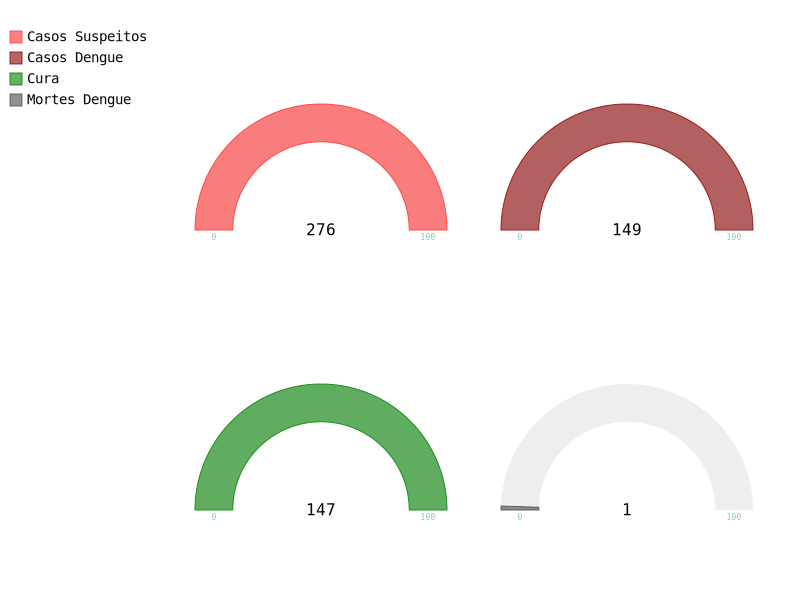

In [10]:
custom_style = Style(
  background='transparent',
  plot_background='transparent',
  foreground='#000000',
  foreground_strong='#53A0E8',
  foreground_subtle='#630C0D',
  opacity='.6',
  opacity_hover='.9',
  transition='400ms ease-in',
  colors=('#ff3333', '#8b0000', '#008000', '#484948'))

gauge = pygal.SolidGauge(
    half_pie=True, inner_radius=0.70, title=u'',
    style=custom_style)

percent_formatter = lambda x: '{:.100g}'.format(x)
gauge.value_formatter = percent_formatter

casos_notificados = len(df)
casos_dengue_confirmados = len(df[df['CLASSI_FIN'] == '10'])
casos_cura_dengue = len(df[df['EVOLUCAO'] == 'Cura'])
n_dengue = df[df['CLASSI_FIN'] == '10']
casos_cura = len(n_dengue[n_dengue['EVOLUCAO'] == 'Cura'])
casos_morte = len(n_dengue[n_dengue['EVOLUCAO'] == 'Obito pelo agravo'])

gauge.add('Casos Suspeitos', [{'value': casos_notificados}], formatter=percent_formatter)
gauge.add('Casos Dengue', [{'value': casos_dengue_confirmados}], formatter=percent_formatter)
gauge.add('Cura', [{'value': casos_cura}], formatter=percent_formatter)
gauge.add('Mortes Dengue', [{'value': casos_morte}], formatter=percent_formatter)

gauge.render_to_png('/home/luis/Dengue/fig/gauge_casos.png')

display(SVG(gauge.render(disable_xml_declaration=True)))

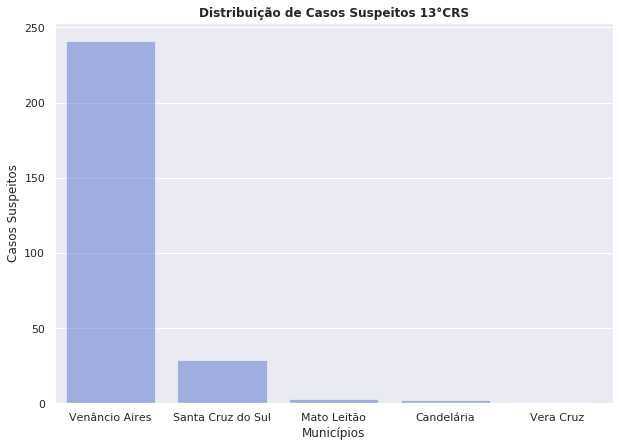

In [11]:
notificacao = df

plt.figure(figsize=(10,7))
sns.set(style="darkgrid")
ax = sns.countplot(notificacao["ID_MUNICIP"], order = notificacao["ID_MUNICIP"].value_counts().index, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Casos Suspeitos 13°CRS', fontweight="bold")
plt.xlabel('Municípios')
plt.ylabel('Casos Suspeitos')
plt.savefig('/home/luis/Dengue/fig/notificacao_municipio.jpeg')

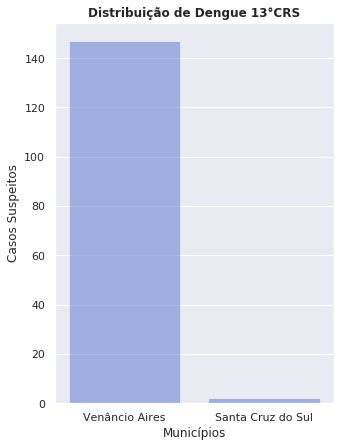

In [12]:
notificacao_dengue_municipios = df[df['CLASSI_FIN'] == '10']

plt.figure(figsize=(5,7))
sns.set(style="darkgrid")
ax = sns.countplot(notificacao_dengue_municipios["ID_MUNICIP"], order = notificacao_dengue_municipios["ID_MUNICIP"].value_counts().index, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Dengue 13°CRS', fontweight="bold")
plt.xlabel('Municípios')
plt.ylabel('Casos Suspeitos')
plt.savefig('/home/luis/Dengue/fig/notificacao_dengue_municipio.jpeg')

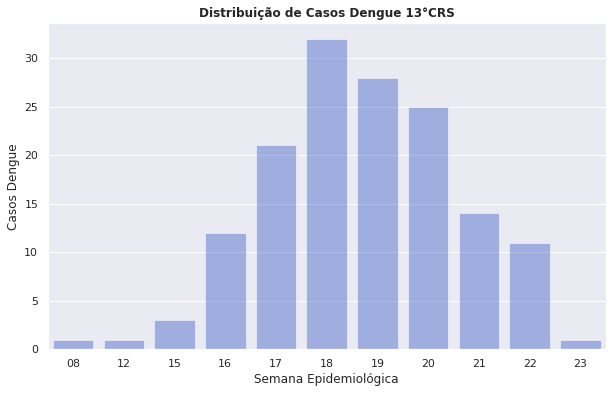

In [13]:
dengue = df[df['CLASSI_FIN'] == '10']

plt.figure(figsize=(10,6))
ax = sns.countplot(x ='SEM_NOT', data =dengue, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Casos Dengue 13°CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Casos Dengue')
plt.savefig('/home/luis/Dengue/fig/dengue_13_crs.jpeg')

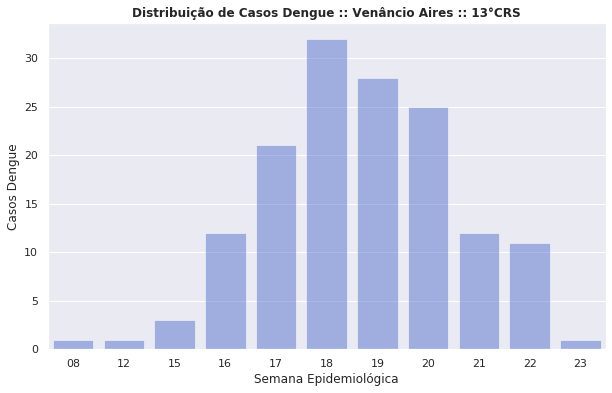

In [14]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='SEM_NOT', data=venancio_dengue, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Casos Dengue :: Venâncio Aires :: 13°CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Casos Dengue')
plt.savefig('/home/luis/Dengue/fig/dengue_venancio.jpeg')

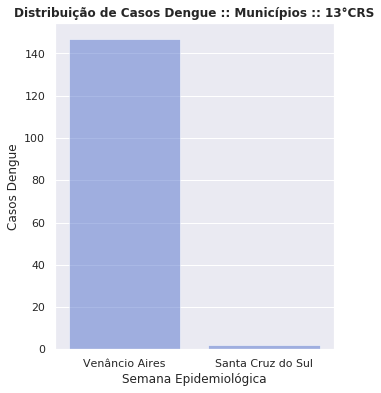

In [15]:
dengue = df[df['CLASSI_FIN'] == '10']

plt.figure(figsize=(5,6))
sns.set(style="darkgrid")
sns.countplot(x='ID_MUNICIP', data=dengue, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Casos Dengue :: Municípios :: 13°CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Casos Dengue')
plt.savefig('/home/luis/Dengue/fig/dengue_municippio.jpeg')

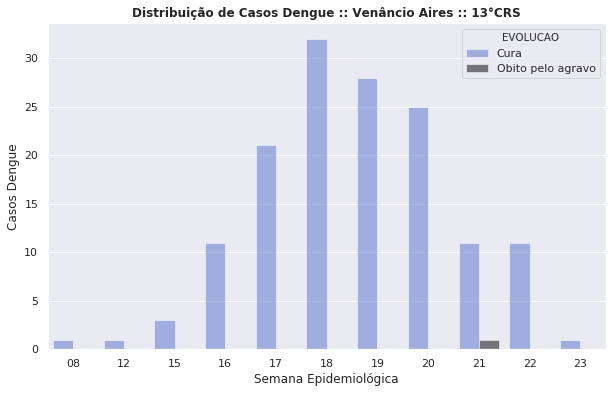

In [16]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='SEM_NOT', hue='EVOLUCAO', data=venancio_dengue, palette= ["#4169E1","#000000"], alpha = 0.5)
plt.title('Distribuição de Casos Dengue :: Venâncio Aires :: 13°CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Casos Dengue')
plt.savefig('/home/luis/Dengue/fig/dengue_venancio_evolucao.jpeg')

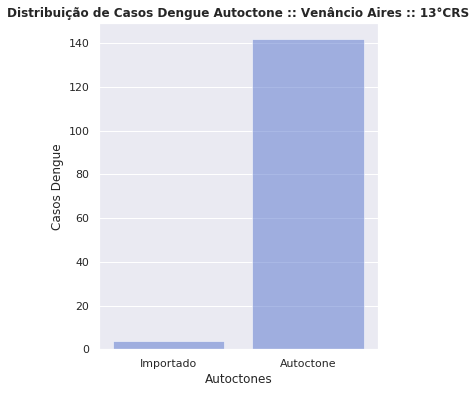

In [17]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(5,6))
sns.set(style="darkgrid")
sns.countplot(x='TPAUTOCTO', data=venancio_dengue, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Casos Dengue Autoctone :: Venâncio Aires :: 13°CRS', fontweight="bold")
plt.xlabel('Autoctones')
plt.ylabel('Casos Dengue')
plt.savefig('/home/luis/Dengue/fig/dengue_venancio_autoctone.jpeg')

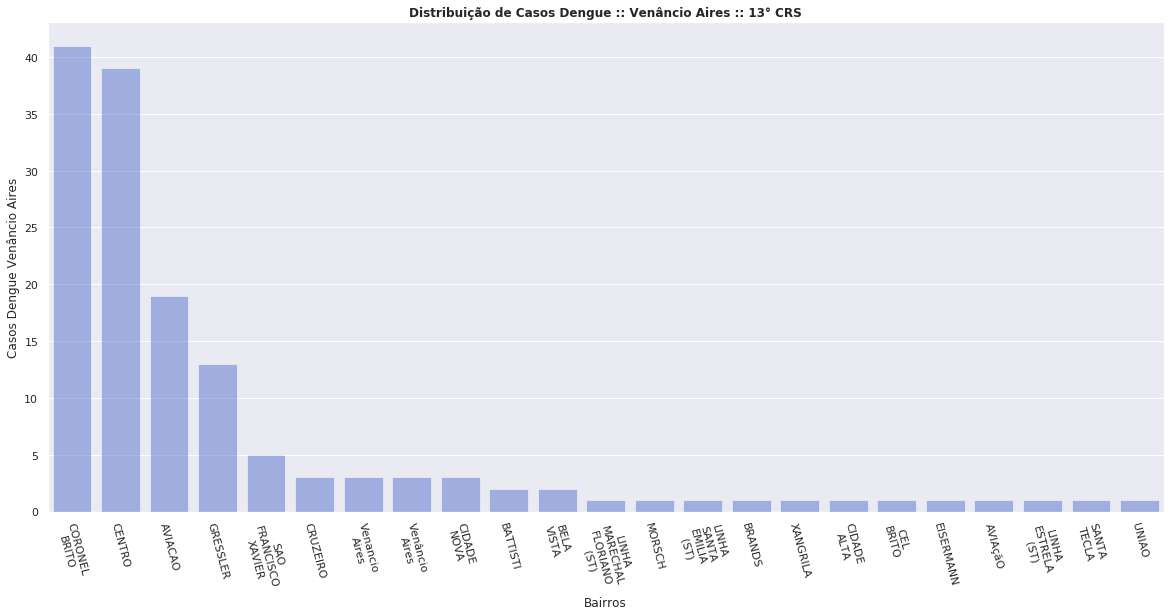

In [18]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(20,9))
sns.set(style="darkgrid")
sns.countplot(x='NM_BAIRRO', data=venancio_dengue, palette=["#4169E1"], order = venancio_dengue['NM_BAIRRO'].value_counts().index, alpha = 0.5)
plt.xticks(rotation=-75) 
plt.title('Distribuição de Casos Dengue :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros')
plt.ylabel('Casos Dengue Venâncio Aires')
plt.savefig('/home/luis/Dengue/fig/dengue_bairros_venancio_aires.jpeg')

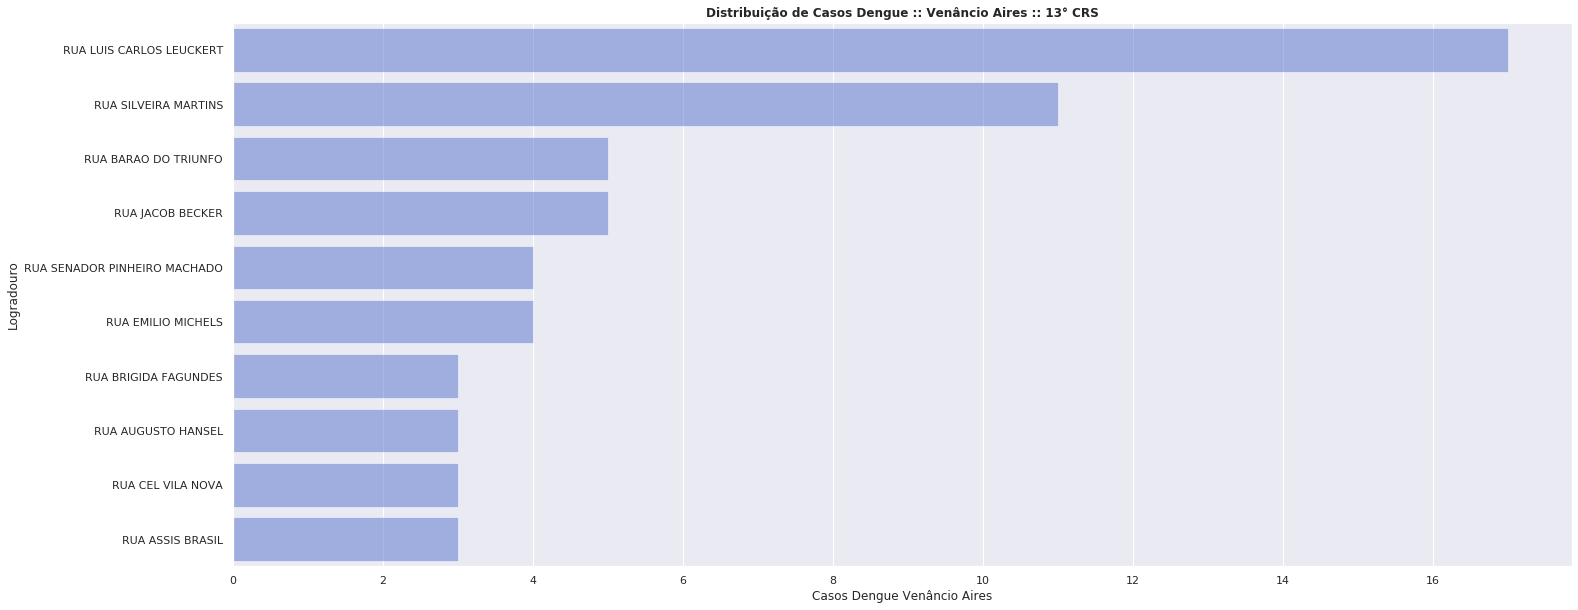

In [19]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(24,10))
sns.set(style="darkgrid")
sns.countplot(y='NM_LOGRADO', data=venancio_dengue, order = venancio_dengue['NM_LOGRADO'].value_counts().iloc[:10].index, palette=["#4169E1"], alpha = 0.5) 
plt.title('Distribuição de Casos Dengue :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Casos Dengue Venâncio Aires')
plt.ylabel('Logradouro')
plt.savefig('/home/luis/Dengue/fig/dengue_logradouros_venancio_aires.jpeg')

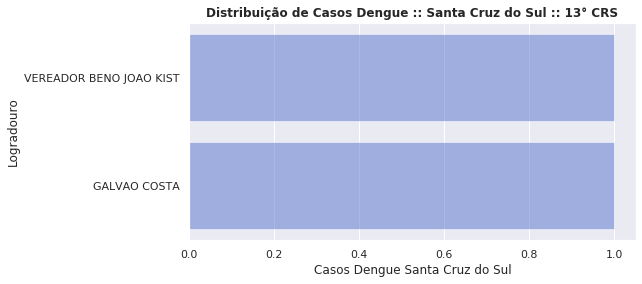

In [20]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Santa Cruz do Sul"]

plt.figure(figsize=(8,4))
sns.set(style="darkgrid")
sns.countplot(y='NM_LOGRADO', data=venancio_dengue, order = venancio_dengue['NM_LOGRADO'].value_counts().iloc[:3].index, palette=["#4169E1"], alpha = 0.5) 
plt.title('Distribuição de Casos Dengue :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.xlabel('Casos Dengue Santa Cruz do Sul')
plt.ylabel('Logradouro')
plt.savefig('/home/luis/Dengue/fig/dengue_logradouros_santa_cruz_sul.jpeg')

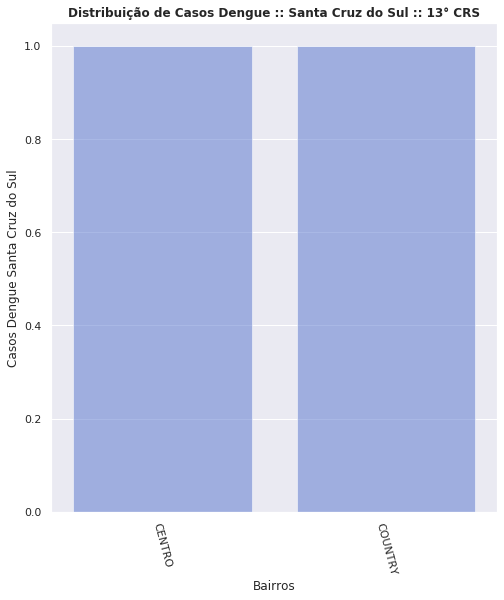

In [21]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Santa Cruz do Sul"]

plt.figure(figsize=(8,9))
sns.set(style="darkgrid")
sns.countplot(x='NM_BAIRRO', data=venancio_dengue, palette=["#4169E1"], order = venancio_dengue['NM_BAIRRO'].value_counts().index, alpha = 0.5)
plt.xticks(rotation=-75) 
plt.title('Distribuição de Casos Dengue :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros')
plt.ylabel('Casos Dengue Santa Cruz do Sul')
plt.savefig('/home/luis/Dengue/fig/dengue_bairros_santa_cruz_sul.jpeg')

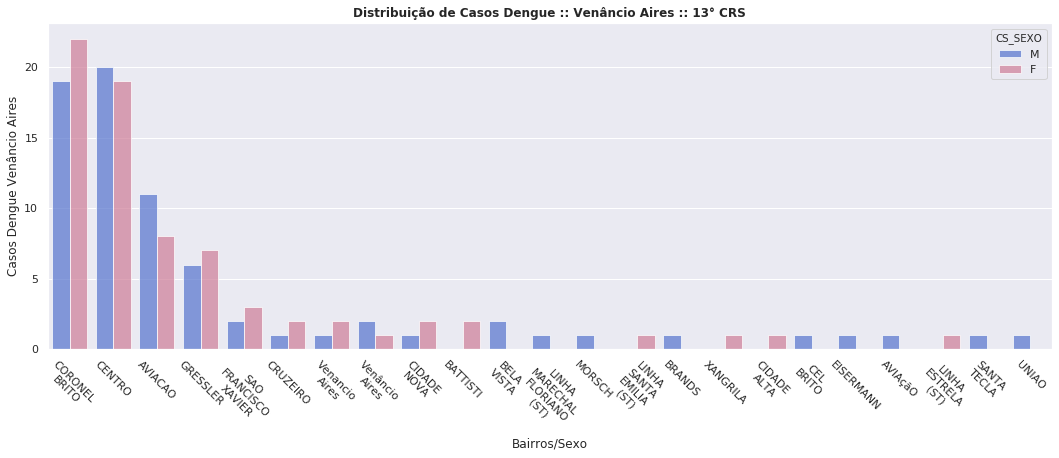

In [22]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(18,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="NM_BAIRRO", hue='CS_SEXO', data=venancio_dengue, palette= ["#4169E1","#DB7093"], order = venancio_dengue['NM_BAIRRO'].value_counts().index, alpha = 0.7)
plt.xticks(rotation=-45)
plt.title('Distribuição de Casos Dengue :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros/Sexo')
plt.ylabel('Casos Dengue Venâncio Aires')
plt.savefig('/home/luis/Dengue/fig/dengue_sexo_bairro_venancio_aires.jpeg')

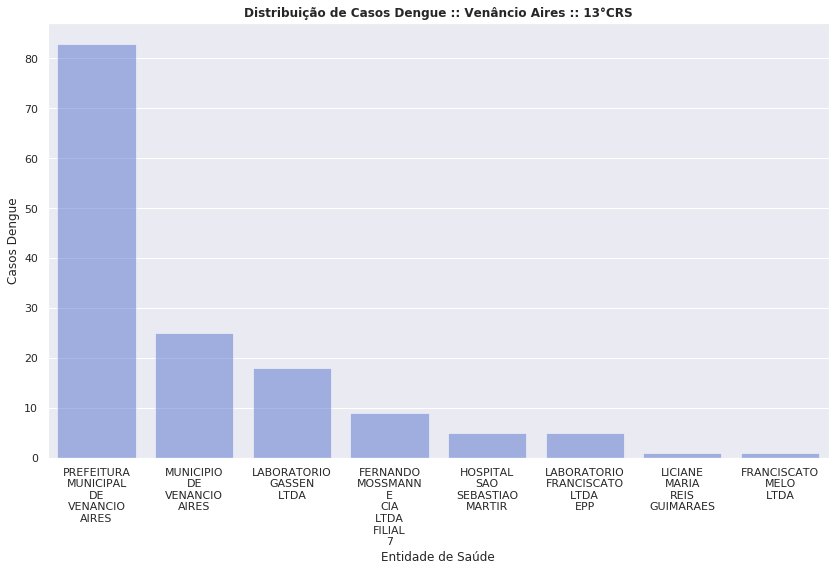

In [23]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(14,8))
sns.countplot(x='ID_UNIDADE', data=venancio_dengue, order = venancio_dengue['ID_UNIDADE'].value_counts().index, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Casos Dengue :: Venâncio Aires :: 13°CRS', fontweight="bold")
plt.xlabel('Entidade de Saúde')
plt.ylabel('Casos Dengue')
plt.savefig('/home/luis/Dengue/fig/dengue_venancio_unidade_arendimento.jpeg')

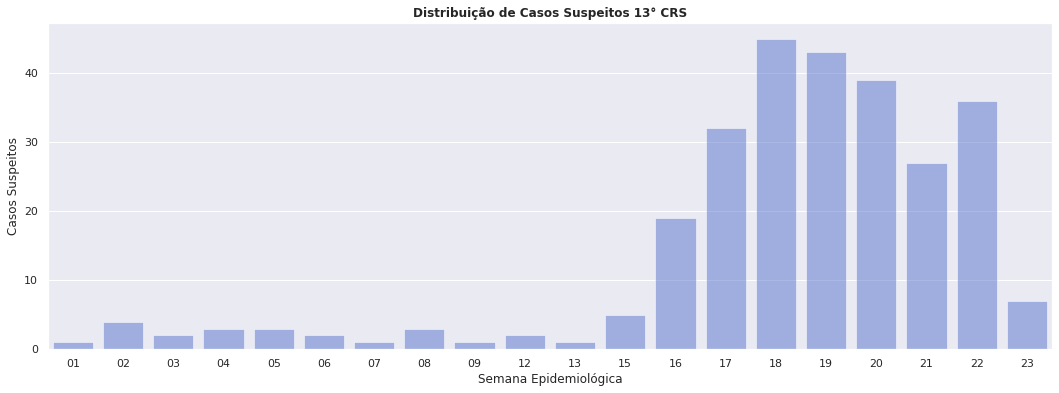

In [24]:
notificacao = df

plt.figure(figsize=(18,6))
sns.countplot(x='SEM_NOT', data=notificacao, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Casos Suspeitos 13° CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Casos Suspeitos')
plt.savefig('/home/luis/Dengue/fig/notificacao_se_13.jpeg')

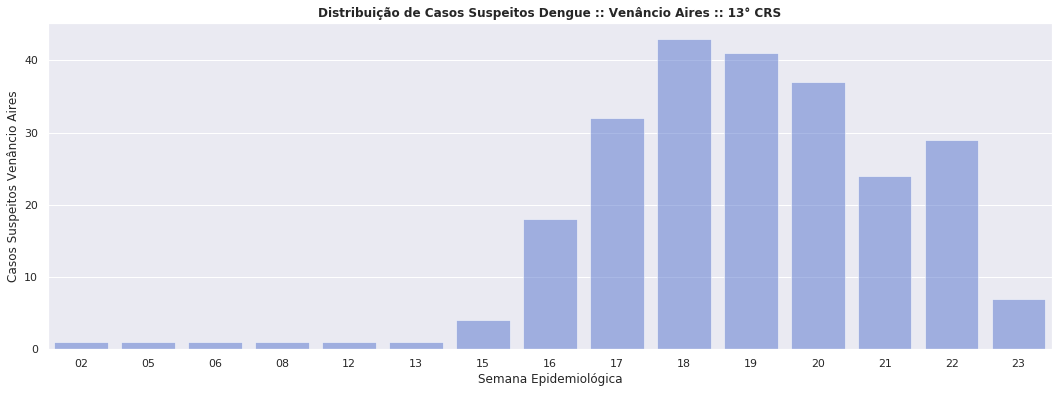

In [25]:
municipio = df[df['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(18,6))
sns.countplot(x='SEM_NOT', data=municipio, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Casos Suspeitos Dengue :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Casos Suspeitos Venâncio Aires')
plt.savefig('/home/luis/Dengue/fig/notificacao_se_venancio_aires.jpeg')

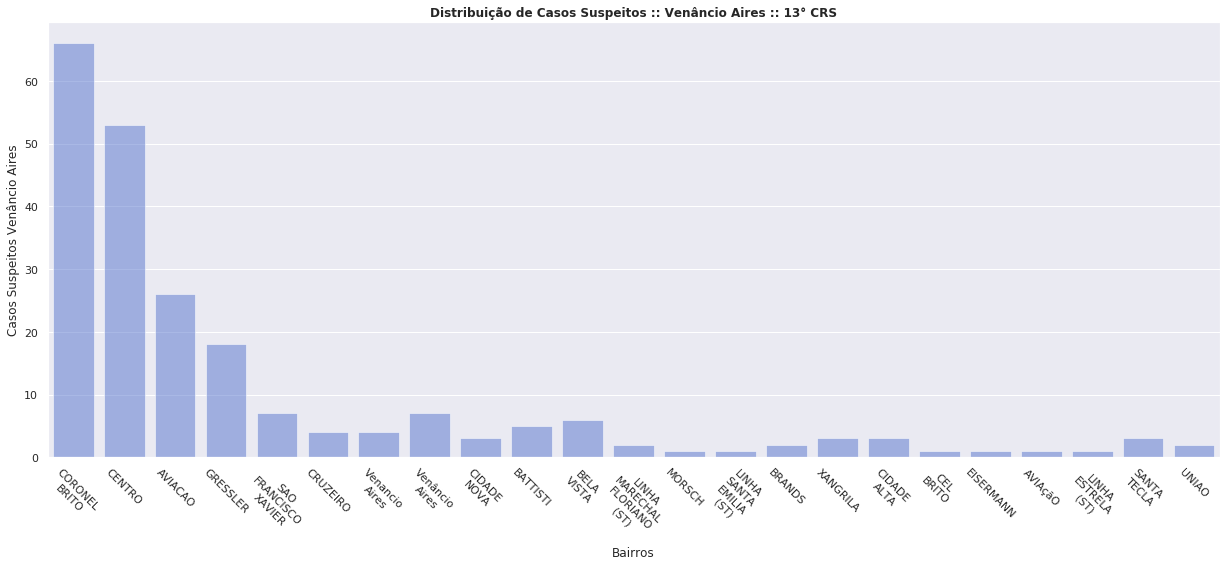

In [26]:
municipio = df[df['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(21,8))
sns.countplot(x='NM_BAIRRO', data=municipio, order = venancio_dengue['NM_BAIRRO'].value_counts().index, palette=["#4169E1"], alpha = 0.5)
plt.xticks(rotation=-45) 
plt.title('Distribuição de Casos Suspeitos :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros')
plt.ylabel('Casos Suspeitos Venâncio Aires')
plt.savefig('/home/luis/Dengue/fig/notificacao_bairros_venancio_aires.jpeg')

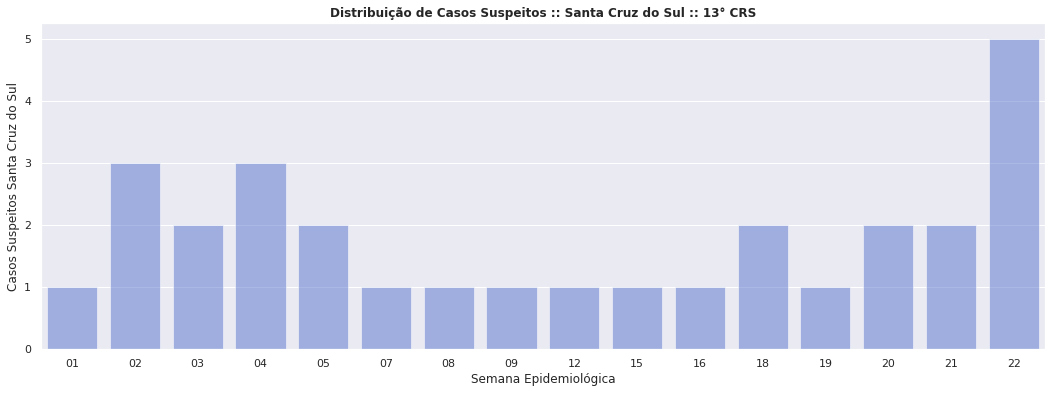

In [27]:
municipio = df[df['ID_MUNICIP'] == "Santa Cruz do Sul"]

plt.figure(figsize=(18,6))
sns.countplot(x='SEM_NOT', data=municipio, palette=["#4169E1"],alpha = 0.5)
plt.title('Distribuição de Casos Suspeitos :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Casos Suspeitos Santa Cruz do Sul')
plt.savefig('/home/luis/Dengue/fig/notificacao_se_santa_cruz.jpeg')

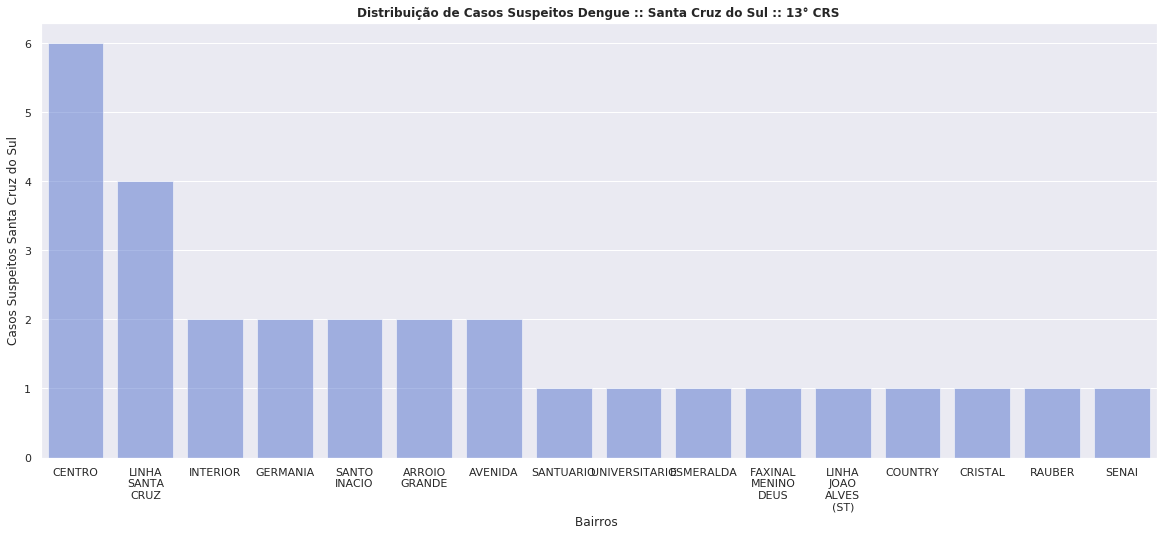

In [28]:
municipio = df[df['ID_MUNICIP'] == "Santa Cruz do Sul"]

plt.figure(figsize=(20,8))
sns.countplot(x='NM_BAIRRO', order = municipio['NM_BAIRRO'].value_counts().index, data=municipio, palette=["#4169E1"], alpha = 0.5)
#plt.xticks(rotation=-45)
plt.title('Distribuição de Casos Suspeitos Dengue :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros ')
plt.ylabel('Casos Suspeitos Santa Cruz do Sul')
plt.savefig('/home/luis/Dengue/fig/notificacao_bairros_santa_cruz.jpeg')

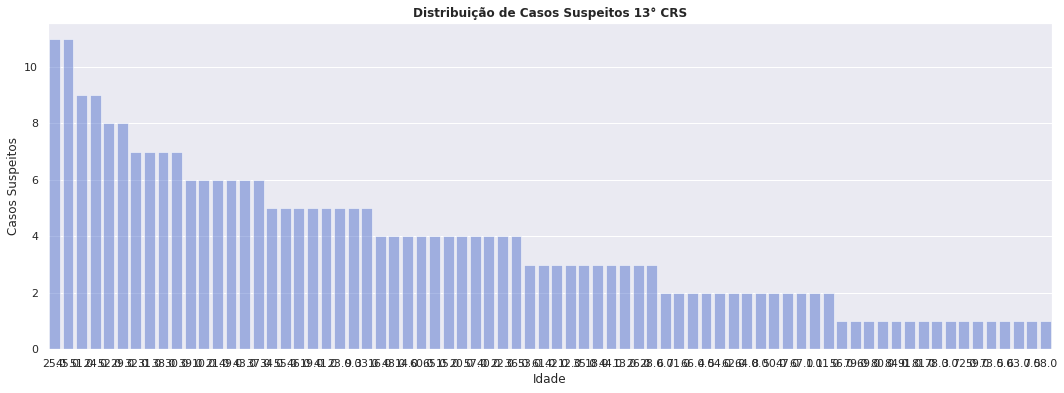

In [29]:
notificacao = df

plt.figure(figsize=(18,6))
sns.countplot(x='NU_IDADE_N', data=notificacao, order = notificacao['NU_IDADE_N'].value_counts().index, palette=["#4169E1"], alpha = 0.5)
plt.title('Distribuição de Casos Suspeitos 13° CRS', fontweight="bold")
plt.xlabel('Idade')
plt.ylabel('Casos Suspeitos')
plt.savefig('/home/luis/Dengue/fig/notificacao_idade_13.jpeg')

<Figure size 1296x864 with 0 Axes>

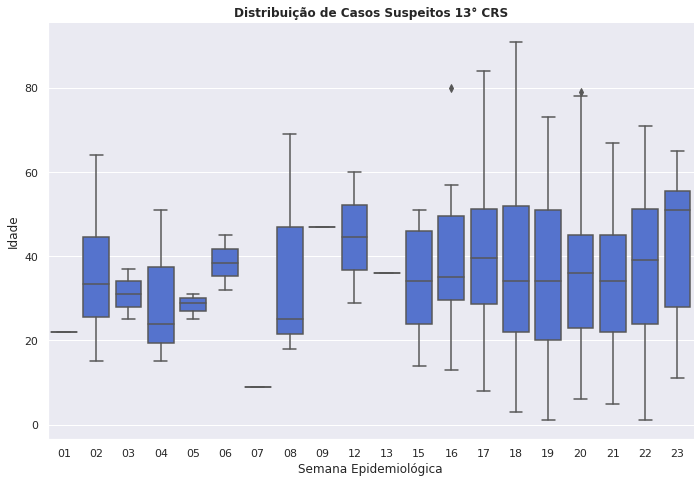

In [30]:
notificacao = df

plt.figure(figsize=(18,12))
ax = sns.catplot(x="SEM_NOT", y="NU_IDADE_N", kind="box", ci=None, data=notificacao, palette=["#4169E1"])
ax.fig.set_size_inches(11,7)
plt.title('Distribuição de Casos Suspeitos 13° CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Idade')
plt.savefig('/home/luis/Dengue/fig/notificacao_idade_se_13.jpeg')

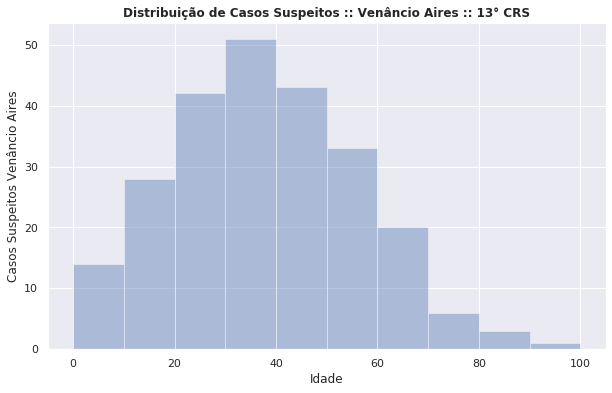

In [31]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.distplot(notificacao['NU_IDADE_N'], bins=10, kde=False, hist_kws={'range':(0,100)})
plt.title('Distribuição de Casos Suspeitos :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Idade')
plt.ylabel('Casos Suspeitos Venâncio Aires')
plt.savefig('/home/luis/Dengue/fig/notificacao_idade_casos_suspeitos_venancio_aires.jpeg')

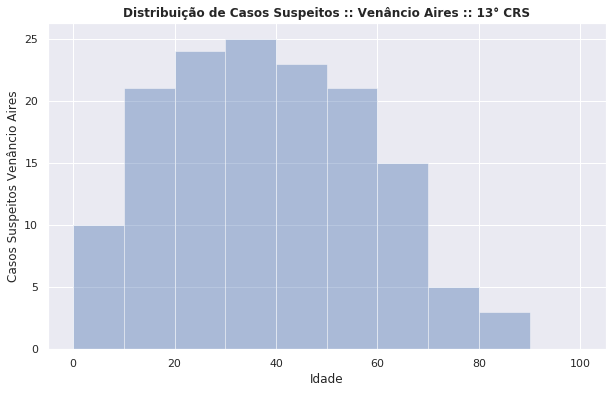

In [32]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.distplot(venancio_dengue['NU_IDADE_N'], bins=10, kde=False, hist_kws={'range':(0,100)})
plt.title('Distribuição de Casos Suspeitos :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Idade')
plt.ylabel('Casos Suspeitos Venâncio Aires')
plt.savefig('/home/luis/Dengue/fig/notificacao_idade_casos_dengue_venancio_aires.jpeg')

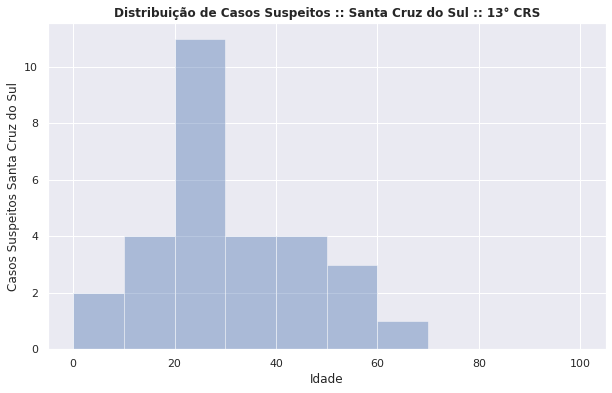

In [33]:
notificacao = df[df['ID_MUNICIP'] == "Santa Cruz do Sul"]

plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.distplot(notificacao['NU_IDADE_N'], bins=10, kde=False, hist_kws={'range':(0,100)})
plt.title('Distribuição de Casos Suspeitos :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.xlabel('Idade')
plt.ylabel('Casos Suspeitos Santa Cruz do Sul')
plt.savefig('/home/luis/Dengue/fig/notificacao_idade_casos_suspeitos_santa_cruz.jpeg')

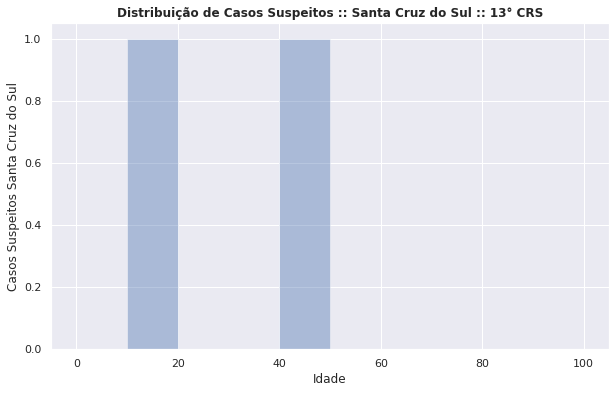

In [34]:
dengue = df[df['CLASSI_FIN'] == '10']
venancio_dengue = dengue[dengue['ID_MUNICIP'] == "Santa Cruz do Sul"]

plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.distplot(venancio_dengue['NU_IDADE_N'], bins=10, kde=False, hist_kws={'range':(0,100)})
plt.title('Distribuição de Casos Suspeitos :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.xlabel('Idade')
plt.ylabel('Casos Suspeitos Santa Cruz do Sul')
plt.savefig('/home/luis/Dengue/fig/notificacao_idade_casos_dengue_santa_cruz.jpeg')

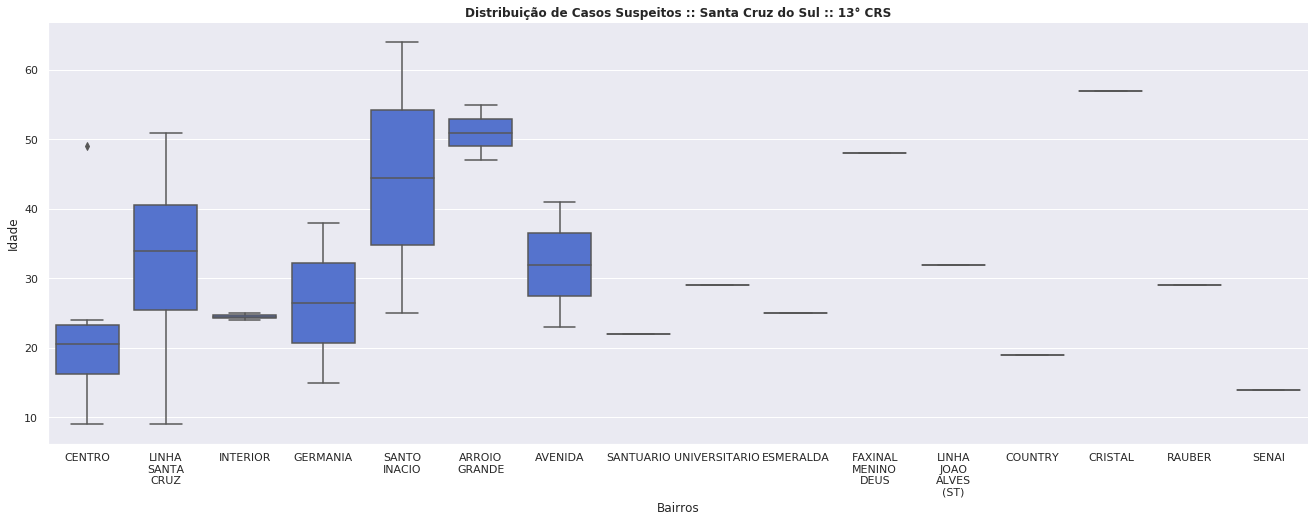

In [35]:
SCS_notificacao = df[df['ID_MUNICIP'] == "Santa Cruz do Sul"]

ax = sns.catplot(x="NM_BAIRRO", y="NU_IDADE_N", kind= "box", ci=None, data=SCS_notificacao, order = SCS_notificacao['NM_BAIRRO'].value_counts().index, palette=["#4169E1"])
ax.fig.set_size_inches(22,8)
#plt.xticks(rotation=-45)
plt.title('Distribuição de Casos Suspeitos :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros')
plt.ylabel('Idade')
plt.savefig('/home/luis/Dengue/fig/notificacao_idade_bairro_santa_cruz.jpeg')

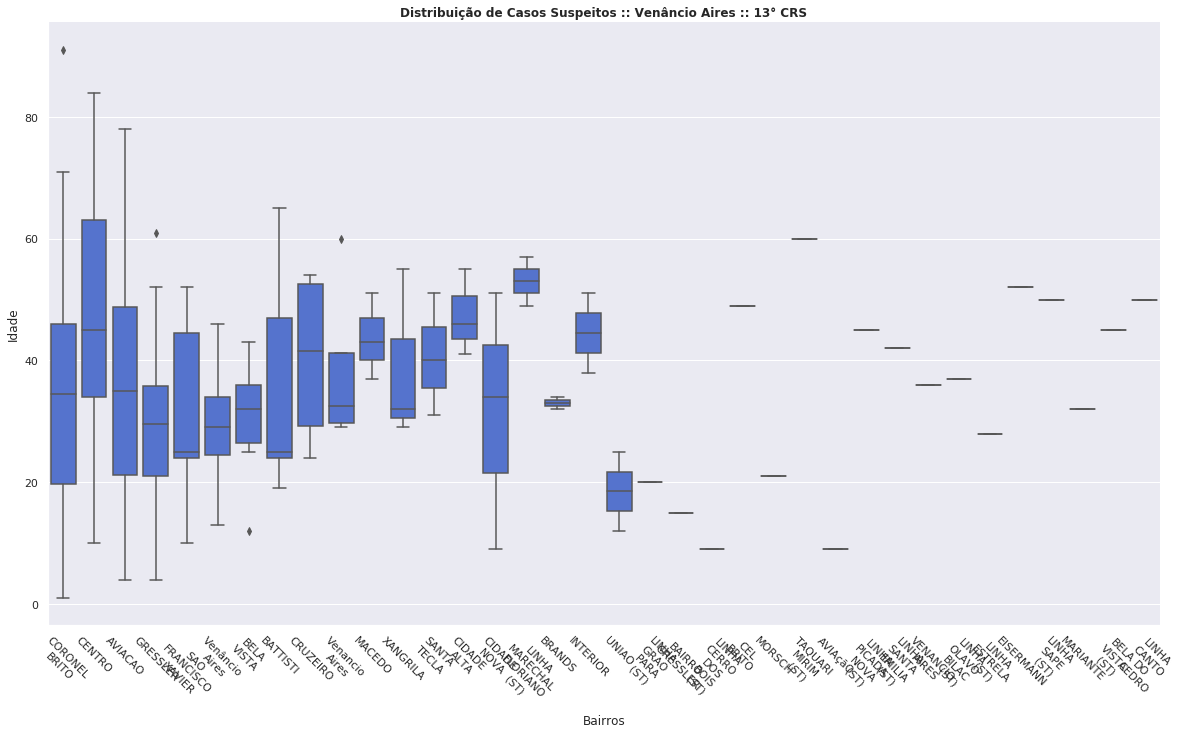

In [36]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]


ax = sns.catplot(x="NM_BAIRRO", y="NU_IDADE_N", kind= "box", ci=None, data=notificacao, palette=["#4169E1"], order = notificacao['NM_BAIRRO'].value_counts().index)
ax.fig.set_size_inches(20,12)
plt.xticks(rotation=-45)
plt.title('Distribuição de Casos Suspeitos :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros')
plt.ylabel('Idade')
plt.savefig('/home/luis/Dengue/fig/notificacao_idade_bairro_venancio_aires.jpeg')

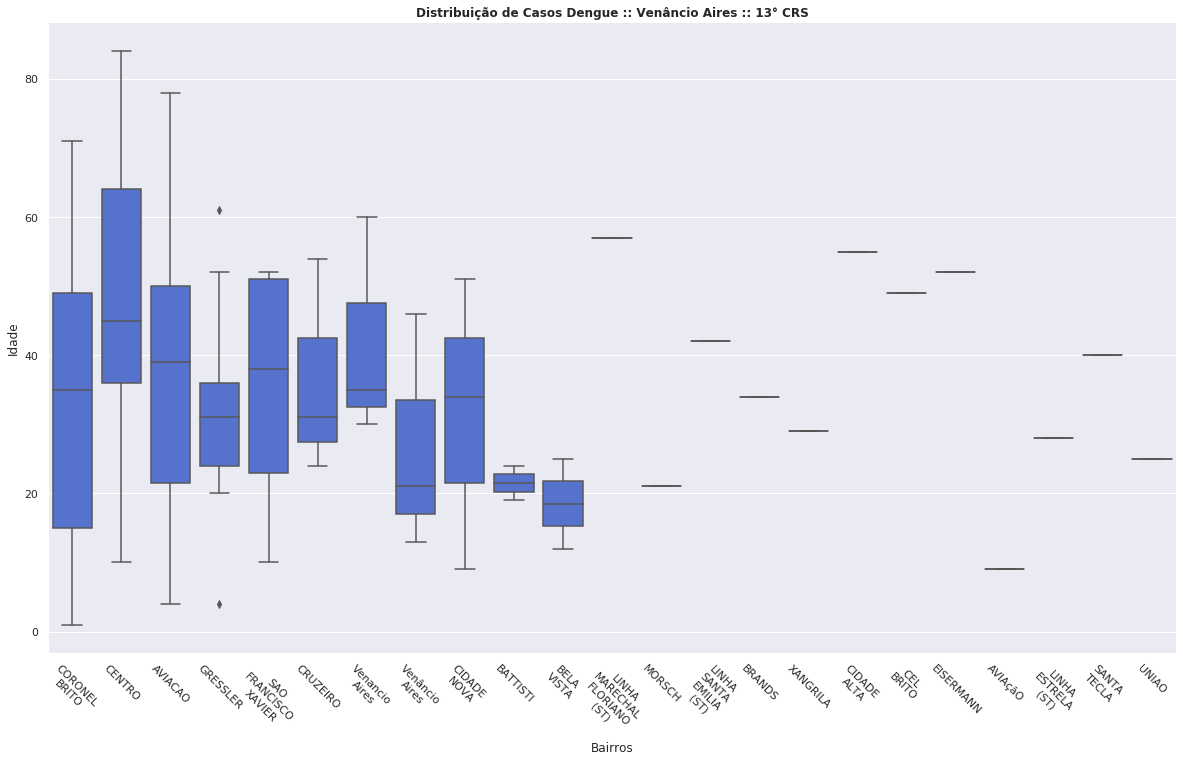

In [37]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]
dengue_venancio_aires_box = notificacao[notificacao['CLASSI_FIN'] == '10']

ax = sns.catplot(x="NM_BAIRRO", y="NU_IDADE_N", kind= "box", ci=None, data=dengue_venancio_aires_box, palette=["#4169E1"], order = dengue_venancio_aires_box['NM_BAIRRO'].value_counts().index)
ax.fig.set_size_inches(20,12)
plt.xticks(rotation=-45)
plt.title('Distribuição de Casos Dengue :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros')
plt.ylabel('Idade')
plt.savefig('/home/luis/Dengue/fig/dengue_idade_bairro_venancio_aires.jpeg')

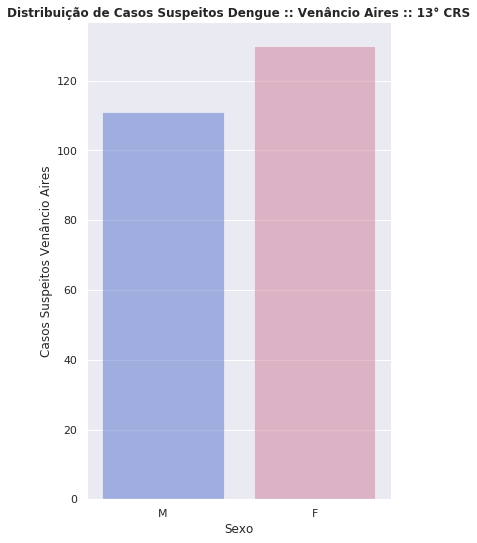

In [38]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]

ax = sns.catplot(x="CS_SEXO", kind="count", data=notificacao, palette= ["#4169E1","#DB7093"], alpha = 0.5)
ax.fig.set_size_inches(5,8)
plt.title('Distribuição de Casos Suspeitos Dengue :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Sexo')
plt.ylabel('Casos Suspeitos Venâncio Aires')
plt.savefig('/home/luis/Dengue/fig/notificacao_sexo_venancio_aires.jpeg')

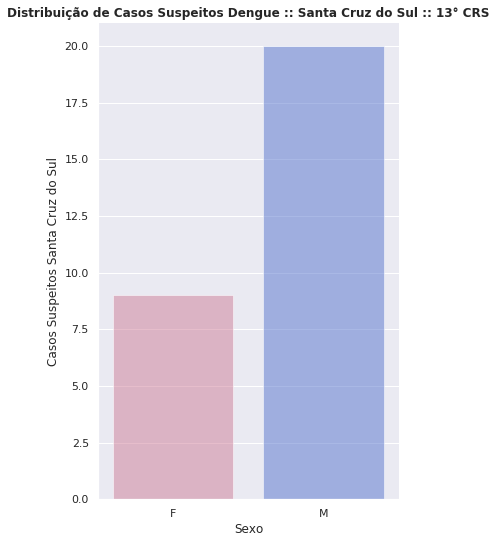

In [39]:
notificacao = df[df['ID_MUNICIP'] == "Santa Cruz do Sul"]

ax = sns.catplot(x="CS_SEXO", kind="count", data=notificacao, palette= ["#DB7093","#4169E1"], alpha = 0.5)
ax.fig.set_size_inches(5,8)
plt.title('Distribuição de Casos Suspeitos Dengue :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.xlabel('Sexo')
plt.ylabel('Casos Suspeitos Santa Cruz do Sul')
plt.savefig('/home/luis/Dengue/fig/notificacao_sexo_santa_cruz.jpeg')

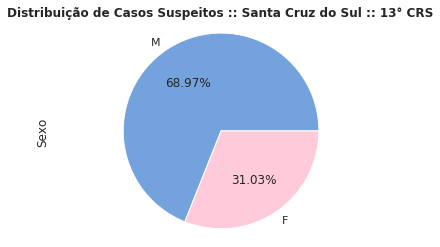

In [40]:
notificacao = df[df['ID_MUNICIP'] == "Santa Cruz do Sul"]

notificacao.CS_SEXO.value_counts().plot(kind='pie', autopct='%.2f%%',colors=["#74A2dc","#FFCBDB"])
plt.axis('equal')  # Para deixar o gráfico redondo
plt.title('Distribuição de Casos Suspeitos :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.ylabel('Sexo')
plt.savefig('/home/luis/Dengue/fig/notificacao_sexo_pizza_santa_cruz.jpeg')

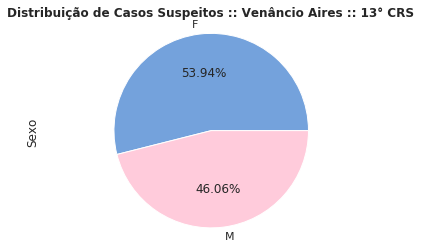

In [41]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]

notificacao.CS_SEXO.value_counts().plot(kind='pie', autopct='%.2f%%', colors=["#74A2dc","#FFCBDB"])
plt.axis('equal')  # Para deixar o gráfico redondo
plt.title('Distribuição de Casos Suspeitos :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.ylabel('Sexo')
plt.savefig('/home/luis/Dengue/fig/notificacao_sexo_pizza_venancio_aires.jpeg')

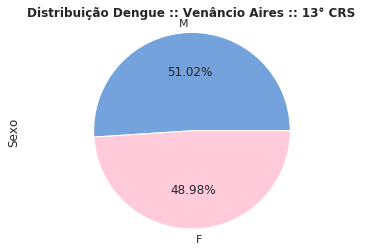

In [42]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]
dengue_venancio_aires_pizza = notificacao[notificacao['CLASSI_FIN'] == '10']

dengue_venancio_aires_pizza.CS_SEXO.value_counts().plot(kind='pie', autopct='%.2f%%', colors=["#74A2dc","#FFCBDB"])
plt.axis('equal')  # Para deixar o gráfico redondo
plt.title('Distribuição Dengue :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.ylabel('Sexo')
plt.savefig('/home/luis/Dengue/fig/dengue_venancio_aires_pizza.jpeg')

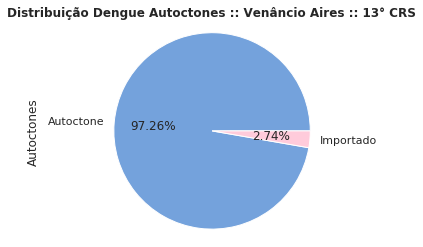

In [43]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]
dengue_venancio_aires_pizza = notificacao[notificacao['CLASSI_FIN'] == '10']

dengue_venancio_aires_pizza.TPAUTOCTO.value_counts().plot(kind='pie', autopct='%.2f%%', colors=["#74A2dc","#FFCBDB"])
plt.axis('equal')  # Para deixar o gráfico redondo
plt.title('Distribuição Dengue Autoctones :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.ylabel('Autoctones')
plt.savefig('/home/luis/Dengue/fig/dengue_venancio_aires_pizza_autoctones.jpeg')

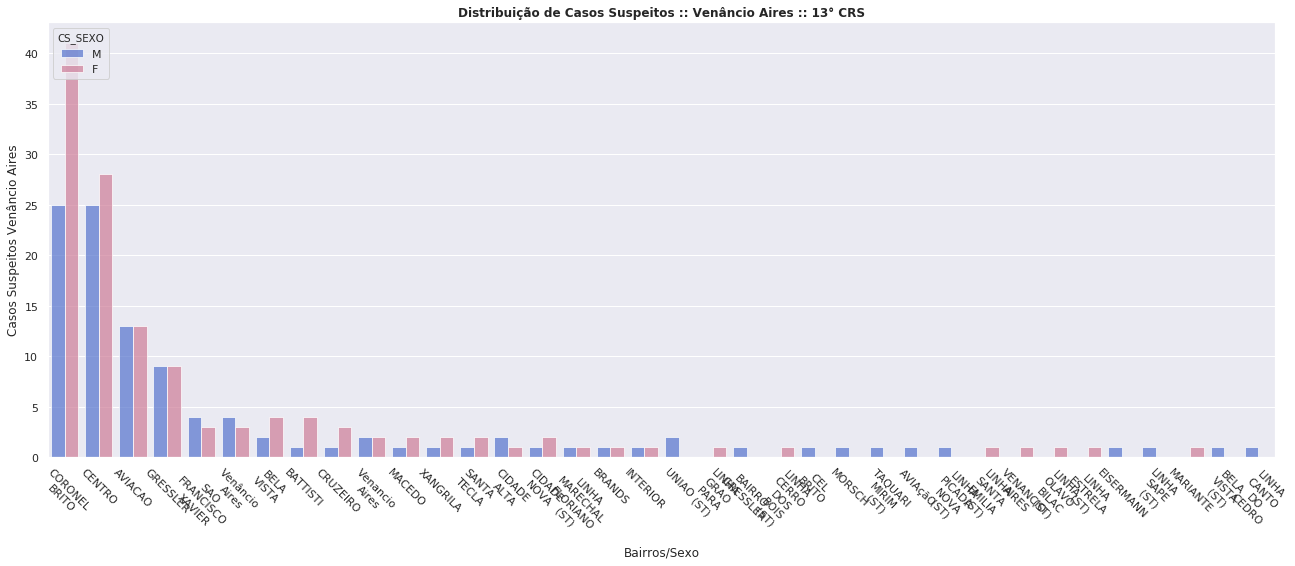

In [44]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(22,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="NM_BAIRRO", hue='CS_SEXO', data=notificacao, palette= ["#4169E1","#DB7093"], order = notificacao['NM_BAIRRO'].value_counts().index, alpha = 0.7)
plt.xticks(rotation=-45)
plt.title('Distribuição de Casos Suspeitos :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros/Sexo')
plt.ylabel('Casos Suspeitos Venâncio Aires')
plt.savefig('/home/luis/Dengue/fig/notificacao_sexo_bairro_venancio_aires.jpeg')

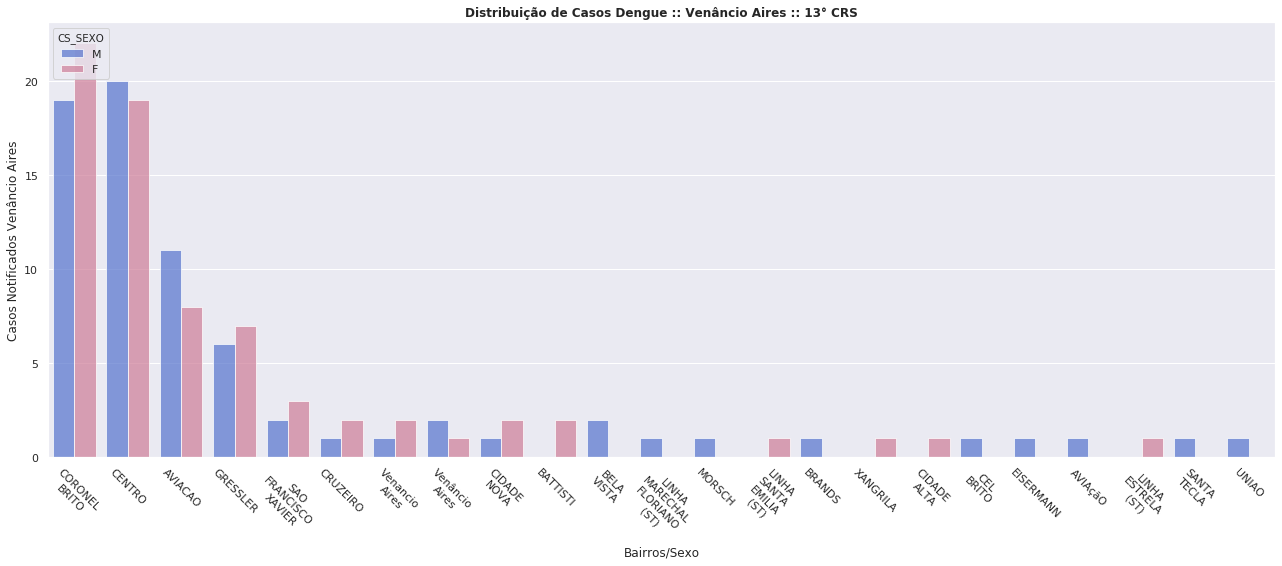

In [45]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]
dengue_venancio_aires = notificacao[notificacao['CLASSI_FIN'] == '10']

plt.figure(figsize=(22,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="NM_BAIRRO", hue='CS_SEXO', data=dengue_venancio_aires, palette= ["#4169E1","#DB7093"], order = dengue_venancio_aires['NM_BAIRRO'].value_counts().index, alpha = 0.7)
plt.xticks(rotation=-45)
plt.title('Distribuição de Casos Dengue :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.xlabel('Bairros/Sexo')
plt.ylabel('Casos Notificados Venâncio Aires')
plt.savefig('/home/luis/Dengue/fig/dengue_sexo_bairro_venancio_aires.jpeg')

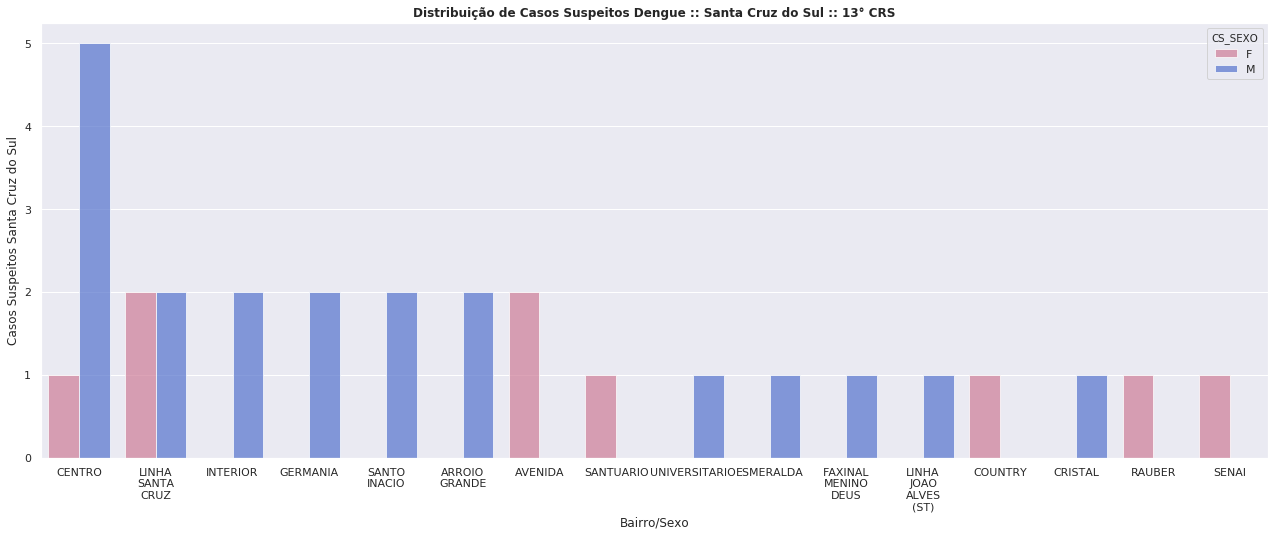

In [46]:
notificacao = df[df['ID_MUNICIP'] == "Santa Cruz do Sul"]

plt.figure(figsize=(22,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="NM_BAIRRO", hue='CS_SEXO', data=notificacao, order = notificacao['NM_BAIRRO'].value_counts().index, palette= ["#DB7093", "#4169E1"], alpha = 0.7)
#plt.xticks(rotation=-45)
plt.title('Distribuição de Casos Suspeitos Dengue :: Santa Cruz do Sul :: 13° CRS', fontweight="bold")
plt.xlabel('Bairro/Sexo')
plt.ylabel('Casos Suspeitos Santa Cruz do Sul')
plt.savefig('/home/luis/Dengue/fig/notificacao_sexo_bairro_santa_cruz.jpeg')

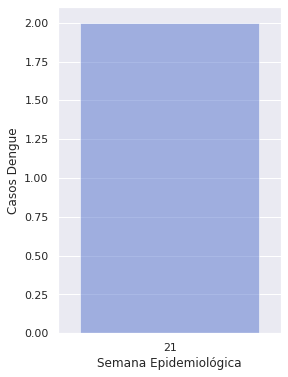

In [47]:
dengue = df[df['CLASSI_FIN'] == '10']
santa_cruz_dengue = dengue[dengue['ID_MUNICIP'] == "Santa Cruz do Sul"]

plt.figure(figsize=(4,6))
sns.countplot(x='SEM_NOT', data=santa_cruz_dengue, palette=["#4169E1"], alpha = 0.5)
#plt.title('Distribuição de Casos Dengue :: Santa Cruz do Sul :: 13°CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Casos Dengue')
plt.savefig('/home/luis/Dengue/fig/dengue_santa_cruz-do_sul.jpeg')

In [48]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]
dengue_venancio_aires = notificacao[notificacao['CLASSI_FIN'] == '10']
dengue_venancio_aires_f = dengue_venancio_aires[dengue_venancio_aires['CS_SEXO'] == "F"]
dengue_venancio_aires_m = dengue_venancio_aires[dengue_venancio_aires['CS_SEXO'] == "M"]

intervalo = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

ClasseEtaria = ['0-5','6-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110']
dengue_v_a_f = pd.DataFrame({"Sexo": 'F', "Numero": dengue_venancio_aires_f['CS_SEXO'].groupby(pd.cut(dengue_venancio_aires_f.NU_IDADE_N, intervalo)).count(), "Intervalo": ClasseEtaria})
dengue_v_a_m = pd.DataFrame({"Sexo": 'M', "Numero": dengue_venancio_aires_m['CS_SEXO'].groupby(pd.cut(dengue_venancio_aires_m.NU_IDADE_N, intervalo)).count(), "Intervalo": ClasseEtaria})

frames = [dengue_v_a_f, dengue_v_a_m]

result = pd.concat(frames)

print(dengue_v_a_f)

           Sexo  Numero Intervalo
NU_IDADE_N                       
(0, 5]        F       2       0-5
(5, 10]       F       6      6-10
(10, 20]      F       5     11-20
(20, 30]      F      15     21-30
(30, 40]      F      12     31-40
(40, 50]      F      10     41-50
(50, 60]      F      12     51-60
(60, 70]      F       7     61-70
(70, 80]      F       3     71-80
(80, 90]      F       0     81-90
(90, 100]     F       0    91-100
(100, 110]    F       0   101-110


In [49]:
df['CLASSI_FIN']= np.where(((df['CLASSI_FIN']=='5')),'Descartado', df['CLASSI_FIN'])         
df['CLASSI_FIN']= np.where(((df['CLASSI_FIN']=='10')),'Dengue', df['CLASSI_FIN'])  
df['CLASSI_FIN']= np.where(((df['CLASSI_FIN']=='11')),'Dengue c sinais alarme', df['CLASSI_FIN'])         
df['CLASSI_FIN']= np.where(((df['CLASSI_FIN']=='12')),'Dengue grave', df['CLASSI_FIN'])  
df['CLASSI_FIN']= np.where(((df['CLASSI_FIN']=='13')),'Chikungunya', df['CLASSI_FIN'])    

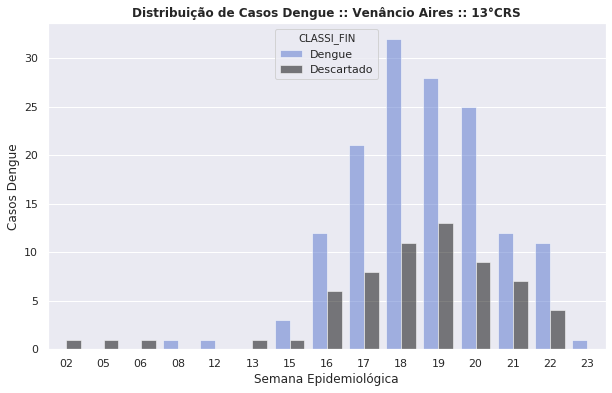

In [50]:
venancio_dengue = df[df['ID_MUNICIP'] == "Venâncio Aires"]

plt.figure(figsize=(10,6))
sns.countplot(x='SEM_NOT', hue='CLASSI_FIN', data=venancio_dengue, palette= ["#4169E1","#000000","#ffffff"], alpha = 0.5)
plt.title('Distribuição de Casos Dengue :: Venâncio Aires :: 13°CRS', fontweight="bold")
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Casos Dengue')
plt.savefig('/home/luis/Dengue/fig/dengue_venancio_grave_descartado_etc.jpeg')

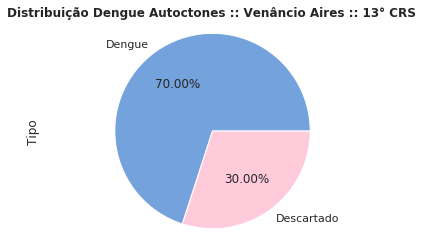

In [51]:
notificacao = df[df['ID_MUNICIP'] == "Venâncio Aires"]

notificacao.CLASSI_FIN.value_counts().plot(kind='pie', autopct='%.2f%%', colors=["#74A2dc","#FFCBDB"])
plt.axis('equal')  # Para deixar o gráfico redondo
plt.title('Distribuição Dengue Autoctones :: Venâncio Aires :: 13° CRS', fontweight="bold")
plt.ylabel('Tipo')
plt.savefig('/home/luis/Dengue/fig/dengue_venancio_aires_pizza_tipo_dengue.jpeg')